# Évaluation NER spaCy alignée sur tokens (Notebook)
Ce notebook lit deux CSV de tokens annotés, les compare, puis calcule précision, rappel et F‑mesure (globalement et par catégorie).

## 1. Import des bibliothèques

In [2]:
import re
import matplotlib.pyplot as plt#pour les courbes

## 2. Lecture de CSV
Dans nos CSV, chaque ligne contient un token et plusieurs colonnes d'étiquette (PER/LOC/ORG/MISC).

In [33]:
def lire_annotations_csv(chemin_csv):
    annotations = []
    with open(chemin_csv, newline='', encoding='utf-8') as f:
        liste_lignes = f.readlines()
    ligne_entete = liste_lignes[0].strip()
    elements_entete = re.split(";", ligne_entete)
    print("Entête:",elements_entete)
    
    annotations = []
    for ligne in liste_lignes[1:]:
        elements_ligne = re.split(";", ligne.strip())
        token = elements_ligne[0]
        dic_annot_token = {}
        for etiquette, annotation in zip(elements_entete[1:], elements_ligne[1:]):
            dic_annot_token[etiquette] = annotation
        annotations.append((token, dic_annot_token))
    print(annotations[-3])
    return annotations
    
annotations_spacy = lire_annotations_csv("data_eval_NER//Noailles-spacy.csv")
annotations1 = lire_annotations_csv("data_eval_NER//Noailles1.csv")
annotations2 = lire_annotations_csv("data_eval_NER//Noailles2.csv")

Entête: ['token', 'PER', 'LOC', 'ORG', 'MISC']
('Jérôme', {'PER': 'x', 'LOC': '', 'ORG': '', 'MISC': ''})
Entête: ['Token', 'LOC', 'PAR', 'ORG', 'MISC']
('Jérôme', {'LOC': '', 'PAR': '', 'ORG': '', 'MISC': ''})
Entête: ['Token', 'LOC', 'PAR', 'ORG', 'MISC']
('Jérôme', {'LOC': '', 'PAR': '', 'ORG': '', 'MISC': ''})


## 3. Calcul des métriques

In [50]:
def calculer_pr_re_f1(vp, fp, fn):
    precision = vp/(vp+fp) if (vp+fp)>0 else 0
    rappel = vp/(vp+fn) if (vp+fn)>0 else 0
    f1 = 0
    if vp>0:
        f1 = 2*precision*rappel/(precision+rappel) 
    return precision, rappel, f1
print(calculer_pr_re_f1(23,5,12))
print(calculer_pr_re_f1(0,5,12))

(0.8214285714285714, 0.6571428571428571, 0.73015873015873)
(0.0, 0.0, 0)


## 4. Comparaison des CSV système et vérité(s) terrain

In [38]:
def comparer_csv(gold_csv, system_csv):
    gold = lire_annotations_csv(gold_csv)
    system = lire_annotations_csv(system_csv)
    if len(gold) != len(system):
        print("Les fichiers n'ont pas le même nombre de lignes.")
        1/0
    dic_global = {"VP":0, "FP":0, "FN":0}
    #ajouter ici une structure de données quand on voudra faire l'évaluation par catégorie
    
    for (tok_g, annot_g), (tok_s, annot_s) in zip(gold, system):
        gold_ent = False
        syst_ent = False
        
        for etiq, val in annot_g.items():            
            if val!="":
                gold_ent = True
        for etiq, val in annot_s.items():
            if val!="":
                syst_ent = True
        
        if gold_ent and syst_ent: 
            dic_global["VP"] += 1
        elif not gold_ent and syst_ent: 
            dic_global["FP"] += 1
        elif gold_ent and not syst_ent: 
            dic_global["FN"] += 1

    print("=== Global ===")
    p,r,f1 = calculer_pr_re_f1(dic_global["VP"], dic_global["FP"], dic_global["FN"])
    print(dic_global)
    print(f"Précision={p:.4f} Rappel={r:.4f} F1={f1:.4f}")    

    print("\n=== Par catégorie ===")
    #à faire


## 5. Exemple d'utilisation

In [47]:
#l'ordre choisi : Vérité de terrain puis le système
comparer_csv('data_eval_NER//Noailles1.csv', 'data_eval_NER//Noailles-spacy_sm.csv')

Entête: ['Token', 'LOC', 'PAR', 'ORG', 'MISC']
('Jérôme', {'LOC': '', 'PAR': '', 'ORG': '', 'MISC': ''})
Entête: ['token', 'PER', 'LOC', 'ORG', 'MISC']
('Jérôme', {'PER': 'x', 'LOC': '', 'ORG': '', 'MISC': ''})
=== Global ===
{'VP': 118, 'FP': 342, 'FN': 38}
Précision=0.2565 Rappel=0.7564 F1=0.3831

=== Par catégorie ===


## 6. Amélioration avec courbes de précision / rappel / F1
Cette fonction calcule les métriques comme précédemment et trace :
- un graphique global (Précision, Rappel, F1)
- un graphique par type d’entité (barres côte à côte) --> à faire.

In [42]:

def comparer_csv_avec_courbe(gold_csv, system_csv):
    gold = lire_annotations_csv(gold_csv)
    system = lire_annotations_csv(system_csv)

    if len(gold) != len(system):
        raise ValueError("Les fichiers n'ont pas le même nombre de lignes.")

    dic_global = {"VP":0, "FP":0, "FN":0}
    
    for (tok_g, annot_g), (tok_s, annot_s) in zip(gold, system):
        gold_ent = False
        syst_ent = False
        
        for etiq, val in annot_g.items():            
            if val!="":
                gold_ent = True
        for etiq, val in annot_s.items():
            if val!="":
                syst_ent = True
        
        if gold_ent and syst_ent: 
            dic_global["VP"] += 1
        elif not gold_ent and syst_ent: 
            dic_global["FP"] += 1
        elif gold_ent and not syst_ent: 
            dic_global["FN"] += 1

    # --- Global ---
    print("=== Global ===")
    p,r,f1 = calculer_pr_re_f1(dic_global["VP"], dic_global["FP"], dic_global["FN"])
    print(dic_global)
    print(f"Précision={p:.4f} Rappel={r:.4f} F1={f1:.4f}") 

    # Courbe globale (barres)
    plt.figure()
    metrics = ["Précision", "Rappel", "F1"]
    values = [p, r, f1]
    plt.bar(metrics, values)
    plt.ylim(0, 1)
    plt.title("Métriques globales (entité / non-entité)")
    plt.ylabel("Score")

    # --- Par type ---
    #à compléter




## Exemple avec courbes

Entête: ['Token', 'LOC', 'PAR', 'ORG', 'MISC']
('Jérôme', {'LOC': '', 'PAR': '', 'ORG': '', 'MISC': ''})
Entête: ['token', 'PER', 'LOC', 'ORG', 'MISC']
('Jérôme', {'PER': 'x', 'LOC': '', 'ORG': '', 'MISC': ''})
=== Global ===
{'VP': 122, 'FP': 324, 'FN': 34}
Précision=0.2735 Rappel=0.7821 F1=0.4053


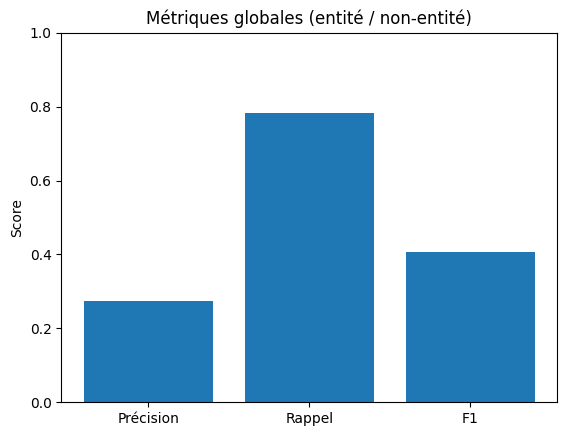

In [43]:
comparer_csv_avec_courbe('data_eval_NER//Noailles1.csv', 'data_eval_NER//Noailles-spacy.csv')